# Importing the needed libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as encoders
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Importing the data

In [2]:
data = pd.read_csv('/Users/elissadejong/P2_creditcard_offer/creditcardmarketing.csv')
data.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


# Taking a peek at the data

In [3]:
data.shape

(18000, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [5]:
data.dtypes

Customer Number           int64
Offer Accepted           object
Reward                   object
Mailer Type              object
Income Level             object
# Bank Accounts Open      int64
Overdraft Protection     object
Credit Rating            object
# Credit Cards Held       int64
# Homes Owned             int64
Household Size            int64
Own Your Home            object
Average Balance         float64
Q1 Balance              float64
Q2 Balance              float64
Q3 Balance              float64
Q4 Balance              float64
dtype: object

In [6]:
# checking for duplicates
data.duplicated().any()

False

# Getting the data into SQL 

## Standardizing the headers of the columns

In [7]:
# replacing ' ' with '_'
cols = []

for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ','_'))

data.columns = cols
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,#_bank_accounts_open,overdraft_protection,credit_rating,#_credit_cards_held,#_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [8]:
# replacing '#_' with ''
cols = []

for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace('#_',''))

data.columns = cols
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


## Generating a copy of the data into a CSV file to load it into SQL

In [9]:
data_sql = data.copy()

In [10]:
data_sql.to_csv(r'/Users/elissadejong/P2_creditcard_offer/creditcardmarketing_sql.csv')

# Data prep

## Checking and dealing with null values & non-alphanumerical characters 

In [11]:
data.isna().sum()/len(data)*100

customer_number         0.000000
offer_accepted          0.000000
reward                  0.000000
mailer_type             0.000000
income_level            0.000000
bank_accounts_open      0.000000
overdraft_protection    0.000000
credit_rating           0.000000
credit_cards_held       0.000000
homes_owned             0.000000
household_size          0.000000
own_your_home           0.000000
average_balance         0.133333
q1_balance              0.133333
q2_balance              0.133333
q3_balance              0.133333
q4_balance              0.133333
dtype: float64

In [12]:
# the amount of null values in average_balance and the q1, q2, q3 and q4 balances is quite low
# hence, the rows with null values are not deleted from the data, but filled with the mean
mean = data['average_balance'].mean()
data['average_balance'] = data['average_balance'].fillna(mean)

In [13]:
mean_q1 = data['q1_balance'].mean()
data['q1_balance'] = data['q1_balance'].fillna(mean_q1)

In [14]:
mean_q2 = data['q2_balance'].mean()
data['q2_balance'] = data['q2_balance'].fillna(mean_q2)

In [15]:
mean_q3 = data['q3_balance'].mean()
data['q3_balance'] = data['q3_balance'].fillna(mean_q3)

In [16]:
mean_q4 = data['q4_balance'].mean()
data['q4_balance'] = data['q4_balance'].fillna(mean_q4)

In [17]:
# checking if the filling of null values worked
data.isna().sum()/len(data)*100

customer_number         0.0
offer_accepted          0.0
reward                  0.0
mailer_type             0.0
income_level            0.0
bank_accounts_open      0.0
overdraft_protection    0.0
credit_rating           0.0
credit_cards_held       0.0
homes_owned             0.0
household_size          0.0
own_your_home           0.0
average_balance         0.0
q1_balance              0.0
q2_balance              0.0
q3_balance              0.0
q4_balance              0.0
dtype: float64

In [18]:
# a function to check for non-alphanumerical characters in columns using regex
def not_alphanum(column):
    pattern = '\W'
    column = column.astype(str)
    for i in column:
        if pattern in i:
            return pattern
        elif pattern not in i:
            return 'no non-alphanumerical characters found'

In [19]:
# the unique values of the following columns:
# - offer_accepted 
# - reward
# - mailer_type, 
# - credit_cards_held  
# - household_size
# were already checked in SQL and did not contain non-alphanumerical characters
# therefore those will not be checked again here in Python

In [20]:
not_alphanum(data['customer_number'])

'no non-alphanumerical characters found'

In [21]:
not_alphanum(data['income_level'])

'no non-alphanumerical characters found'

In [22]:
not_alphanum(data['bank_accounts_open'])

'no non-alphanumerical characters found'

In [23]:
not_alphanum(data['overdraft_protection'])  

'no non-alphanumerical characters found'

In [24]:
not_alphanum(data['credit_rating'])

'no non-alphanumerical characters found'

In [25]:
not_alphanum(data['homes_owned'])

'no non-alphanumerical characters found'

In [26]:
not_alphanum(data['own_your_home'])

'no non-alphanumerical characters found'

In [27]:
not_alphanum(data[['average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']])

'no non-alphanumerical characters found'

## Prepping the numerical variables

In [28]:
# making a dataframe with only the numerical variables
numerical = pd.DataFrame(data.select_dtypes(np.number))
numerical.describe()

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.064214,619.663515,457.097214,553.083487,558.628553
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.937500,393.000000,664.000000,633.000000,363.750000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1006.500000,773.000000,1032.000000,946.000000,704.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1152.562500,1520.250000,1342.000000,1462.000000,1211.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [29]:
# dropping the 'customer_number' column as it is supposed to remain hidden & excluded
numerical = numerical.drop('customer_number', axis=1)

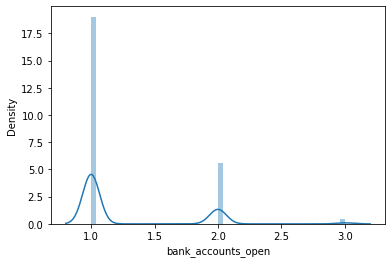

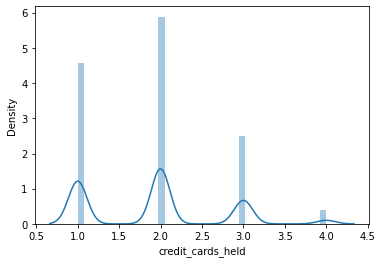

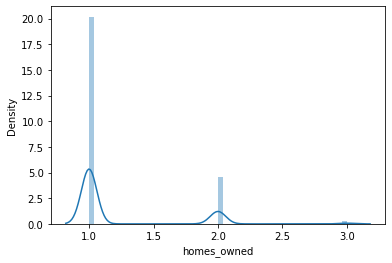

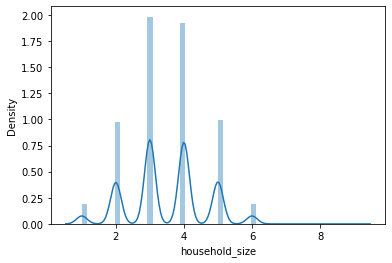

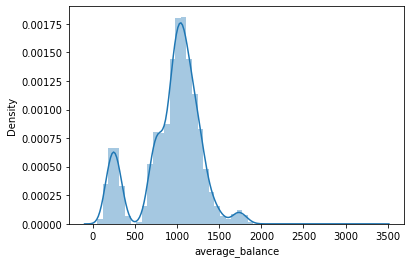

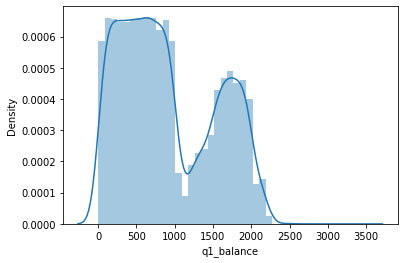

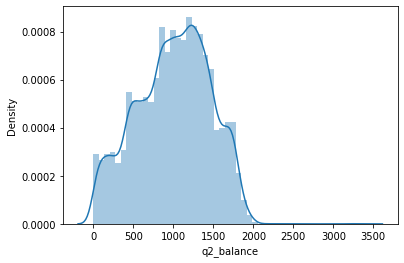

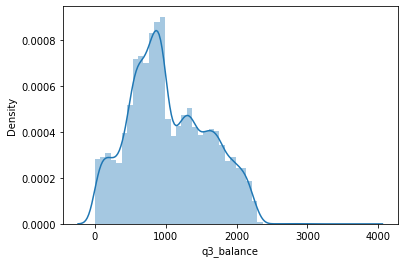

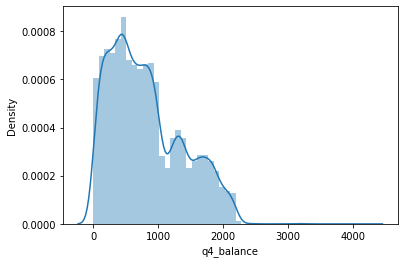

In [30]:
# visualising the numerical variables using distplot
for column in numerical.columns:
    sns.distplot(numerical[column])
    plt.show()

### Checking the correlations & checking for multicollinearity

In [31]:
# checking the correlations using corr() & heatmapping
numerical.corr()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
bank_accounts_open,1.000000,-0.001728,0.004772,0.008479,-0.003906,-0.002812,-0.007949,0.000190,-0.000355
credit_cards_held,-0.001728,1.000000,-0.002547,-0.003074,-0.003467,-0.009440,-0.007369,-0.007619,0.015354
homes_owned,0.004772,-0.002547,1.000000,0.005304,0.017959,0.013138,0.009754,0.007771,0.014769
household_size,0.008479,-0.003074,0.005304,1.000000,-0.003581,-0.005078,-0.008762,0.003631,0.000232
average_balance,-0.003906,-0.003467,0.017959,-0.003581,1.000000,0.481507,0.800285,0.752741,0.572380
q1_balance,-0.002812,-0.009440,0.013138,-0.005078,0.481507,1.000000,0.483134,-0.060961,-0.237283
q2_balance,-0.007949,-0.007369,0.009754,-0.008762,0.800285,0.483134,1.000000,0.487710,0.168955
q3_balance,0.000190,-0.007619,0.007771,0.003631,0.752741,-0.060961,0.487710,1.000000,0.565298
q4_balance,-0.000355,0.015354,0.014769,0.000232,0.572380,-0.237283,0.168955,0.565298,1.000000


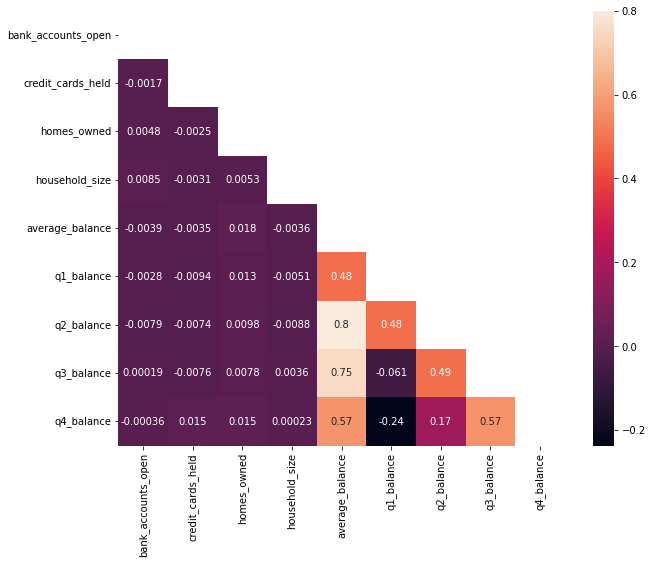

In [32]:
mask = np.zeros_like(numerical.corr())

mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(numerical.corr(), mask=mask, annot=True)
plt.show()

In [33]:
# checking for multicollinearity using VIF
vif_numerical = add_constant(numerical)
vif_numerical

,const,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1.0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,1.0,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,1.0,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,1.0,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,1.0,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...
17995,1.0,1,1,1,5,167.50,136.0,65.0,71.0,398.0
17996,1.0,1,3,1,3,850.50,984.0,940.0,943.0,535.0
17997,1.0,1,2,1,4,1087.25,918.0,767.0,1170.0,1494.0
17998,1.0,1,4,2,2,1022.25,626.0,983.0,865.0,1615.0


In [34]:
vif = pd.DataFrame(index=vif_numerical.columns)

vif["VIF Factor"] = [round(variance_inflation_factor(np.array(vif_numerical), i),2)
                     for i in range(len(vif_numerical.columns))]

In [35]:
vif.sort_values("VIF Factor")

,VIF Factor
bank_accounts_open,1.00
credit_cards_held,1.00
homes_owned,1.00
household_size,1.00
const,38.54
average_balance,inf
q1_balance,inf
q2_balance,inf
q3_balance,inf
q4_balance,inf


In [36]:
# as can be expected, the VIF-table returns infinite VIF for the variables regarding balance
# as average balance is linked to the balances of each quarter and vice versa
# thus, at this point, no variable is yet excluded

### Applying BoxCox to the continuous variables

In [37]:
# BoxCox is applied to the columns representing:
# the average balance and the balances of each quarter
# using a function
# attempting to have these take a more normal distribution 

def boxcox_transform(numerical):
    numeric_cols = numerical[['average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']].columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        numerical[column] = np.where(numerical[column]<=0, np.NAN, numerical[column]) 
        numerical[column] = numerical[column].fillna(numerical[column].mean())
        transformed_data, ci = stats.boxcox(numerical[column])
        numerical[column] = transformed_data
        _ci[column] = [ci] 
    return numerical, _ci

In [38]:
numerical, _ci = boxcox_transform(numerical)

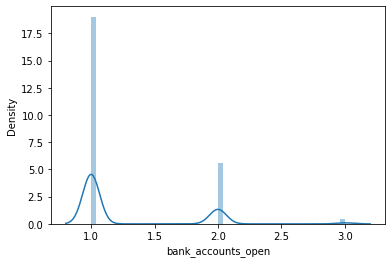

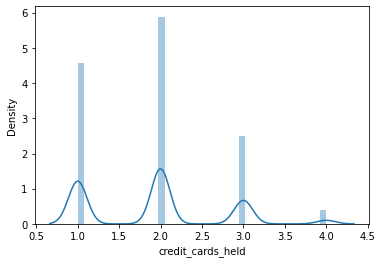

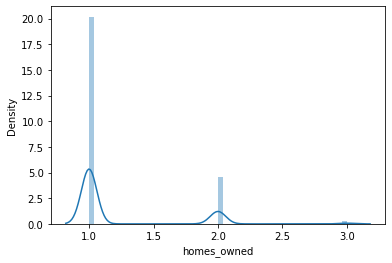

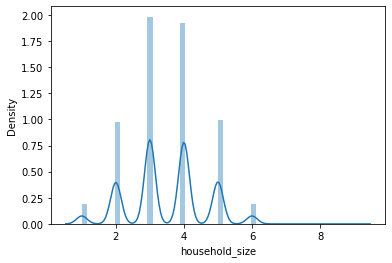

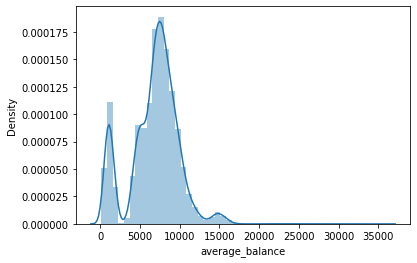

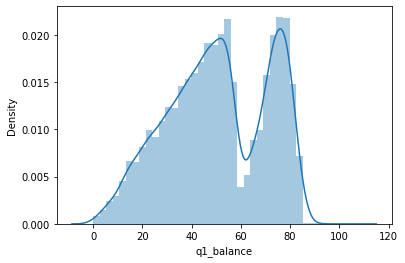

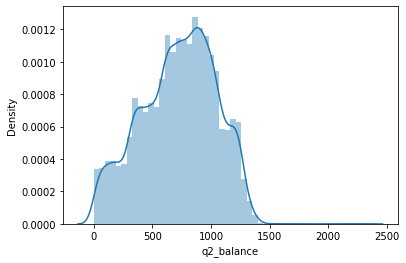

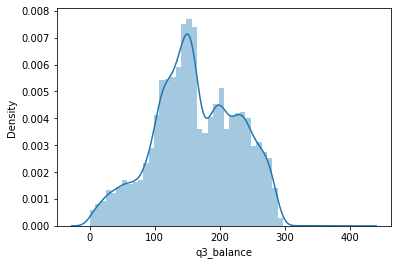

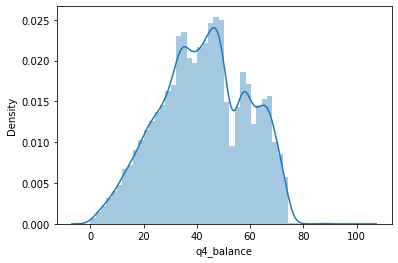

In [39]:
# checking the results

for column in numerical.columns:
    sns.distplot(numerical[column])
    plt.show()

### Dealing with outliers: removal for the continuous variables, capping for the count variables

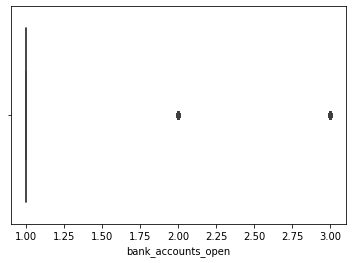

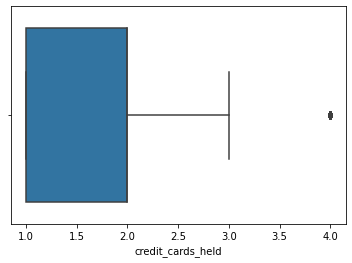

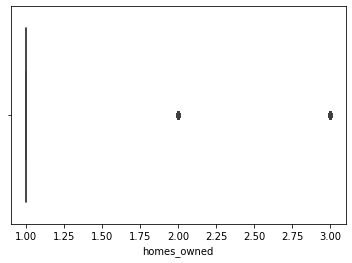

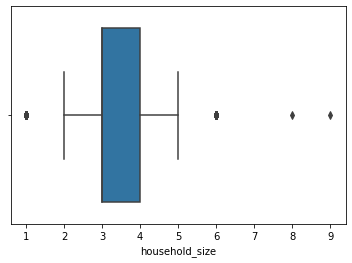

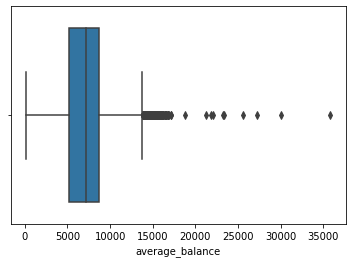

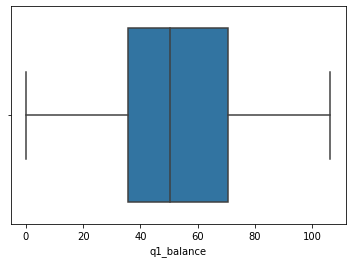

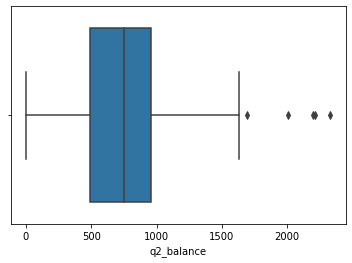

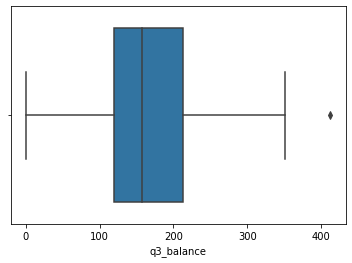

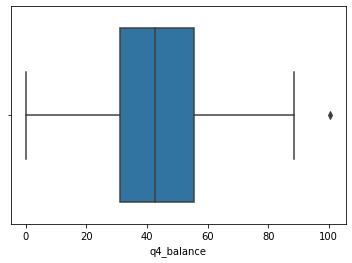

In [40]:
# checking for outliers among the numerical variables

for column in numerical.columns:
    sns.boxplot(numerical[column])
    plt.show()

In [41]:
# outliers are removed from the columns representing:
# the average balance and the balances of each quarter
# removing outliers using a function

# upper and lower limit are changed to 0.85 and 0.15, otherwise the axes are empty

def remove_outliers(numerical, threshold=1.5, in_columns=numerical.columns, skip_columns=['bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size']):
    for column in in_columns:
        upper = np.quantile(numerical[column],0.85)
        lower = np.quantile(numerical[column],0.15)
        iqr = upper - lower
        upper_limit = upper + (threshold * iqr)
        lower_limit = lower - (threshold * iqr)
        numerical = numerical[(numerical[column]>lower_limit) & (numerical[column]<upper_limit)]
    return numerical

In [42]:
numerical = remove_outliers(numerical, threshold=1.5, in_columns=numerical.columns, skip_columns=['bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size'])

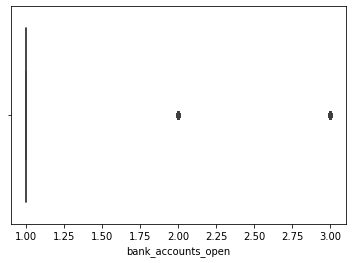

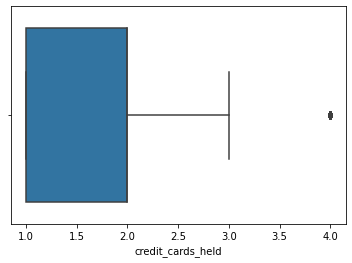

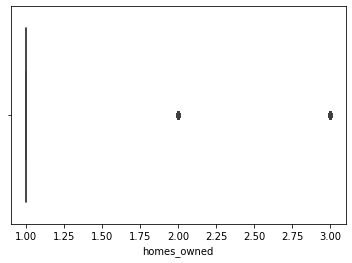

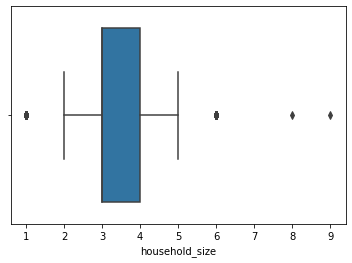

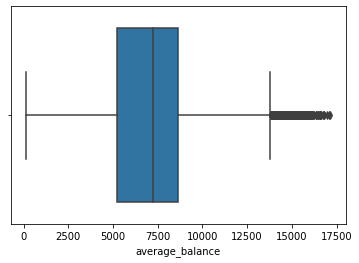

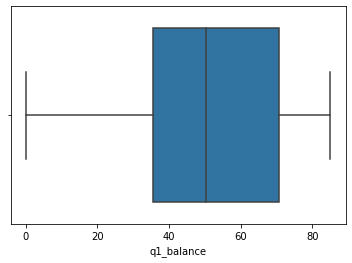

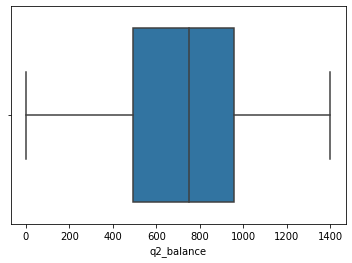

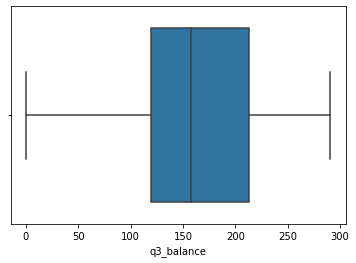

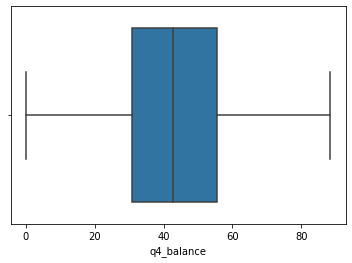

In [43]:
# checking the removal of outliers:
for column in numerical.columns:
    sns.boxplot(numerical[column])
    plt.show()

In [44]:
# outliers are again removed with different upper and lower limit for 'average_balance'
# as there are still quite some outliers present
def remove_outliers(numerical, threshold=1.5, in_columns=numerical[['average_balance']].columns, skip_columns=[]):
    for column in in_columns:
        upper = np.quantile(numerical[column],0.75)
        lower = np.quantile(numerical[column],0.25)
        iqr = upper - lower
        upper_limit = upper + (threshold * iqr)
        lower_limit = lower - (threshold * iqr)
        numerical = numerical[(numerical[column]>lower_limit) & (numerical[column]<upper_limit)]
    return numerical

In [45]:
numerical = remove_outliers(numerical, threshold=1.5, in_columns=numerical[['average_balance']].columns, skip_columns=[])

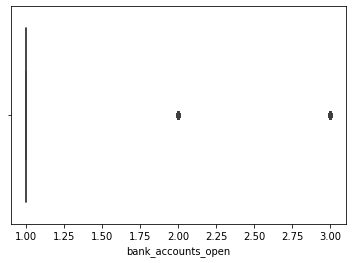

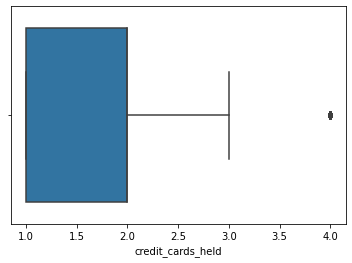

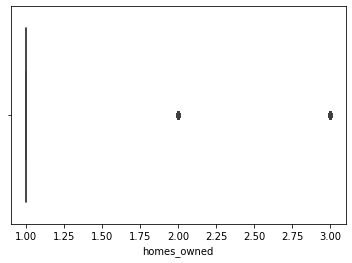

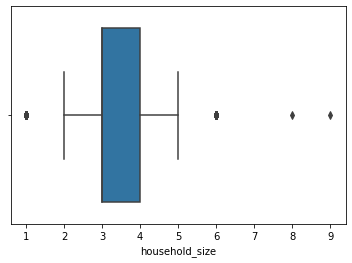

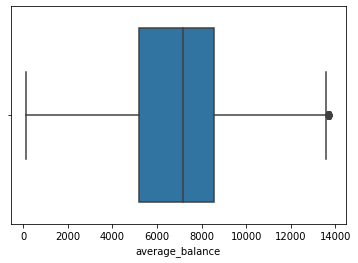

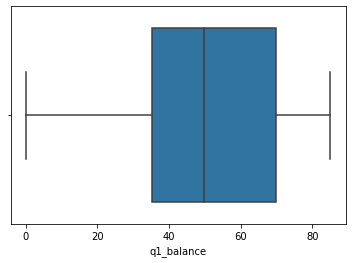

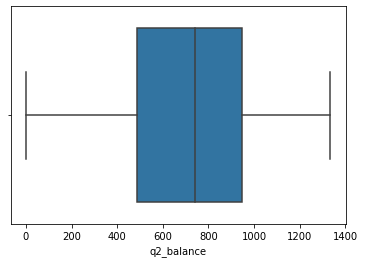

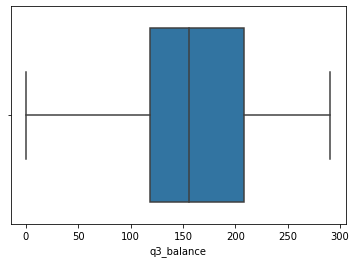

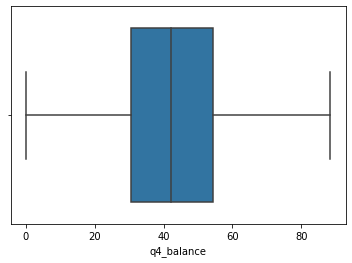

In [46]:
# checking, again, for the removal of outliers:
for column in numerical.columns:
    sns.boxplot(numerical[column])
    plt.show()

In [47]:
# outliers are capped, using the clip() function, for the following columns:
# bank_accounts_open (resulting in 1 or 2/2+)
# credit_cards_held (resulting in 1, 2 or 3/3+)
# homes_owned (resulting in 1 or 2/2+)
# household_size (resulting in 1, 2, 3, 4 or 5/5+)

numerical['bank_accounts_open_clipped'] = numerical['bank_accounts_open'].clip(0,2)

numerical['credit_cards_held_clipped'] = numerical['credit_cards_held'].clip(0,3)

numerical['homes_owned_clipped'] = numerical['homes_owned'].clip(0,2)

numerical['household_size_clipped'] = numerical['household_size'].clip(0,5)

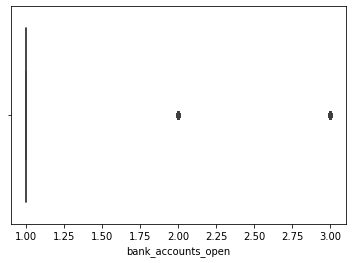

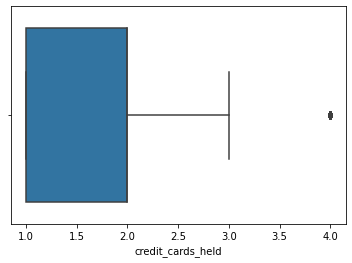

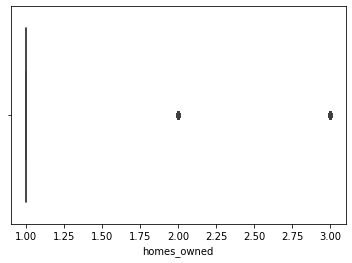

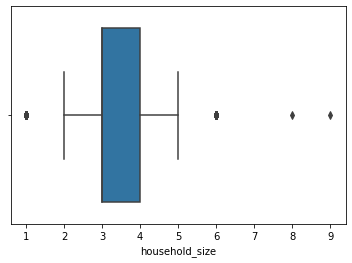

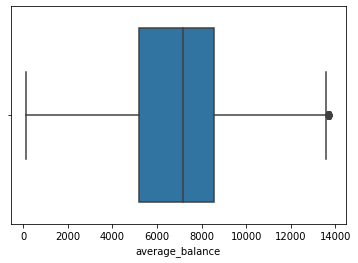

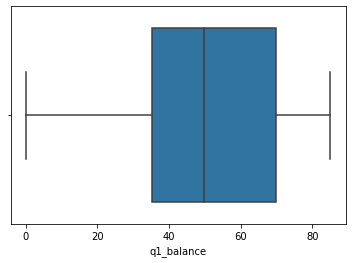

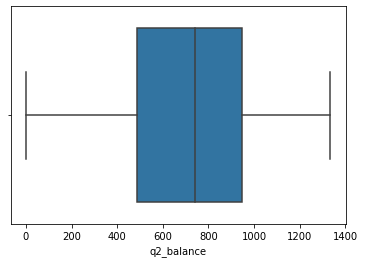

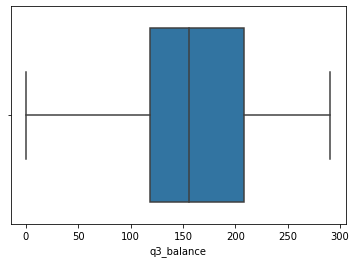

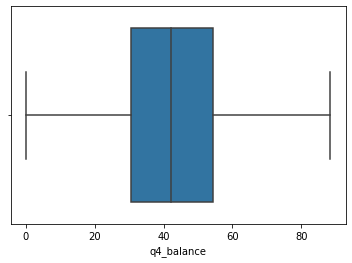

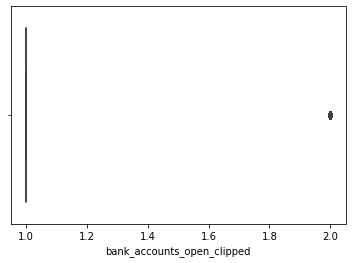

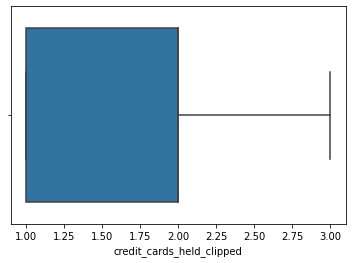

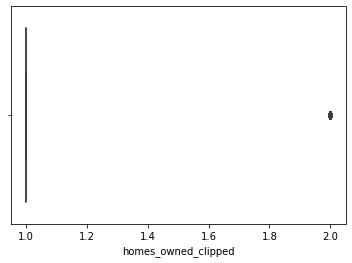

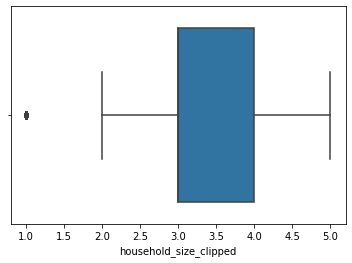

In [48]:
# checking the clipping
for column in numerical.columns:
    sns.boxplot(numerical[column])
    plt.show()

## Prepping the data for the model

In [49]:
categorical = pd.DataFrame(data.select_dtypes(np.object))
categorical.describe()

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
count,18000,18000,18000,18000,18000,18000,18000
unique,2,3,2,3,2,3,2
top,No,Air Miles,Postcard,Medium,No,High,Yes
freq,16977,6061,9147,9013,15322,6071,11655


### Chi-square test

In [50]:
# taking out the target variable
categorical_indepvars = categorical.drop('offer_accepted', axis=1)

In [51]:
col_names = categorical_indepvars.columns
for i in col_names:
    for j in col_names:
        if i != j:
            data_crosstab = pd.crosstab(categorical[i], categorical[j], margins = False)
            print(i, j, chi2_contingency(data_crosstab, correction=False))

reward mailer_type (0.8985334599146192, 0.6380958767071728, 2, array([[2981.00183333, 3079.99816667],
       [2950.50816667, 3048.49183333],
       [2921.49      , 3018.51      ]]))
reward income_level (2.593947767973481, 0.6278956241169493, 4, array([[1524.00477778, 1502.11783333, 3034.87738889],
       [1508.41522222, 1486.75216667, 3003.83261111],
       [1493.58      , 1472.13      , 2974.29      ]]))
reward overdraft_protection (1.5212485310861386, 0.467374570081467, 2, array([[5159.25788889,  901.74211111],
       [5106.48211111,  892.51788889],
       [5056.26      ,  883.74      ]]))
reward credit_rating (2.316082014017522, 0.6778426226084249, 4, array([[2044.24061111, 2005.85427778, 2010.90511111],
       [2023.32938889, 1985.33572222, 1990.33488889],
       [2003.43      , 1965.81      , 1970.76      ]]))
reward own_your_home (1.9199266892849023, 0.3829069213079838, 2, array([[2136.5025, 3924.4975],
       [2114.6475, 3884.3525],
       [2093.85  , 3846.15  ]]))
mailer_type r

In [52]:
# chi-square statistic, p value, degrees of freedom, expected frequencies matrix

In [53]:
# the p-values are all > 0.05 so the null-hypothesis can be accepted
# meaning, there is no relationship between 2 categorical variables

In [54]:
# merging the numerical with the categorical
data_m = pd.merge(numerical, categorical, left_index=True, right_index=True)
data_m.describe()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,bank_accounts_open_clipped,credit_cards_held_clipped,homes_owned_clipped,household_size_clipped
count,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000,17632.000000
mean,1.255388,1.905002,1.202643,3.499943,6646.179886,50.112914,711.054862,160.821972,41.902860,1.239338,1.876475,1.192491,3.469657
std,0.471464,0.796591,0.426489,1.113134,2847.940228,20.334128,311.173641,63.772715,16.134975,0.426691,0.736706,0.394268,1.056397
min,1.000000,1.000000,1.000000,1.000000,127.949269,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,3.000000,5178.141074,35.307070,487.512605,118.637441,30.614208,1.000000,1.000000,1.000000,3.000000
50%,1.000000,2.000000,1.000000,3.000000,7174.114692,49.742080,739.343981,156.308982,42.234124,1.000000,2.000000,1.000000,3.000000
75%,1.000000,2.000000,1.000000,4.000000,8548.537483,69.760282,946.298409,208.636663,54.345690,1.000000,2.000000,1.000000,4.000000
max,3.000000,4.000000,3.000000,9.000000,13773.562603,85.050254,1334.385762,290.838210,88.462220,2.000000,3.000000,2.000000,5.000000


In [55]:
data_m = data_m.drop(data_m[['bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size']], axis=1)

### ColumnTransformer

#### Standardizing, OneHotEncoder & OrdinalEncoder

In [56]:
# standardizing the continuous variables
# applying OneHotEncoder to the categorical variables (not dropping 'first')
# applying OrdinalEncoder to the ordinal variables

ord_mapping = [{'col' : 'income_level', 'mapping' : {'Low': 1, 'Medium': 2, 'High': 3}},
              {'col' : 'credit_rating', 'mapping' : {'Low': 1, 'Medium': 2, 'High': 3}}]

ct = ColumnTransformer(
    [("standard", StandardScaler(), ['average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']),
     ("onehot", OneHotEncoder(sparse=False),
      ['reward', 'mailer_type', 'overdraft_protection', 'own_your_home']),
     ("ordinal", encoders.OrdinalEncoder(mapping = ord_mapping),
     ['income_level', 'credit_rating'])])

### train_test_split

In [57]:
# splitting the features from the target variable
X = data_m.drop('offer_accepted', axis=1)
y = data_m['offer_accepted']

In [58]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [59]:
# checking stratify
y_train.value_counts()

No     13299
Yes      806
Name: offer_accepted, dtype: int64

In [60]:
y_test.value_counts()

No     3325
Yes     202
Name: offer_accepted, dtype: int64

# Fitting and training the model: logistic regression

In [61]:
# applying the ColumnTransformer
ct.fit(X_train)
X_train_trans = ct.transform(X_train)

In [62]:
# applying the same transformation on the X_test
X_test_trans = ct.transform(X_test)

In [63]:
# fitting the model
logreg = LogisticRegression()
logreg.fit(X_train_trans, y_train)

LogisticRegression()

In [64]:
# result:
print(logreg.score(X_test_trans, y_test))

0.9427275304791608


In [65]:
# getting predictions
predictions = logreg.predict(X_test_trans)
predictions

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [66]:
# making a confusion matrix
confusion_matrix(y_test, predictions)
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
cf_matrix

array([[0.94272753, 0.        ],
       [0.05727247, 0.        ]])

<AxesSubplot:>

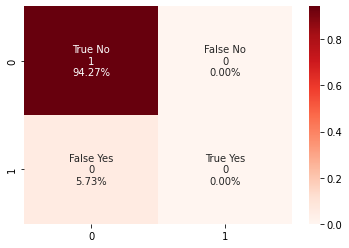

In [67]:
group_names = ['True No', 'False No', 'False Yes', 'True Yes']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

## Evaluation & ROC

In [68]:
# whilst the score of the model is good, it can be concluded from the confusion matrix
# that the model cannot predict a True 1 (offer_accepted = 'Yes'), 
# which is what the purpose of the model should be

In [69]:
# getting probabilities 
probabilities = logreg.predict_proba(X_test_trans)
probabilities

array([[0.7359307 , 0.2640693 ],
       [0.96929882, 0.03070118],
       [0.91804271, 0.08195729],
       ...,
       [0.96366138, 0.03633862],
       [0.9912151 , 0.0087849 ],
       [0.86215151, 0.13784849]])

In [70]:
# getting the ROC-AUC score
roc_auc_score = roc_auc_score(y_test, probabilities[:,1])
roc_auc_score

0.7522340504727165

In [71]:
# the AUC score indicates that the model is able to distinguish the positive class values from the negative class values. 
# this is the case because the classifier is able to detect:
# more numbers of True positives and True negatives than False negatives and False positives

# however, the score is not very good (should be closer to 1)

In [72]:
# overfitting or underfitting the cause? 
# quick check 
# overfitting is when the train score > test score
print(logreg.score(X_train_trans, y_train))

0.9428571428571428


# Fitting and training the model: KNN

In [73]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [74]:
# applying the ColumnTransformer
ct.fit(X_train)
X_train_trans_knn = ct.transform(X_train)

In [75]:
# applying the same transformation on the X_test
X_test_trans_knn = ct.transform(X_test)

In [76]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_trans_knn, y_train)

KNeighborsClassifier(n_neighbors=4)

In [77]:
predictions_knn = knn.predict(X_test_trans_knn)
score_knn = knn.score(X_test_trans_knn, y_test)
score_knn

0.942160476325489

In [78]:
# making a confusion matrix
confusion_matrix(y_test, predictions_knn)
cf_matrix = confusion_matrix(y_test, predictions_knn, normalize='all')
cf_matrix

array([[0.94102637, 0.00170116],
       [0.05613836, 0.00113411]])

<AxesSubplot:>

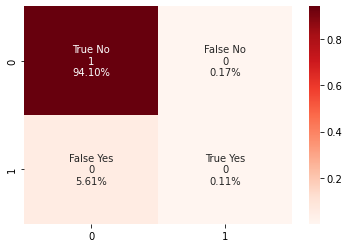

In [79]:
group_names = ['True No', 'False No', 'False Yes', 'True Yes']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

In [80]:
# is overfitting the case?
score_knn_train = knn.score(X_train_trans_knn, y_train)
score_knn_train

0.943778801843318

## Evaluation 

In [81]:
# the model is perhaps a bit overfitted as the train score is a bit larger than the test score
# (marginally, but still)
# this model is also not good at making predictions for bank customers accepting the offer 

# Fixing the data imbalance of the target variable

## UpSampling using SMOTE

In [82]:
data_m.offer_accepted.value_counts()

No     16624
Yes     1008
Name: offer_accepted, dtype: int64

In [83]:
smote = SMOTE()

X = data_m.drop('offer_accepted', axis=1)
y = data_m['offer_accepted']

In [84]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [85]:
# applying the ColumnTransformer
ct.fit(X_train)
X_train_trans_sm = ct.transform(X_train)

In [86]:
# applying the same transformation on the X_test
X_test_trans_sm = ct.transform(X_test)

In [87]:
X_train_sm, y_train_sm = smote.fit_resample(X_train_trans_sm, y_train)
y_train_sm.value_counts()

No     13299
Yes    13299
Name: offer_accepted, dtype: int64

In [88]:
# fitting the model
logreg = LogisticRegression()
logreg.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [89]:
# result:
print(logreg.score(X_test_trans_sm, y_test))

0.6784802948681599


In [90]:
# getting predictions
predictions_sm = logreg.predict(X_test_trans_sm)
predictions_sm

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'Yes'], dtype=object)

In [91]:
# making a confusion matrix
confusion_matrix(y_test, predictions_sm)
cf_matrix = confusion_matrix(y_test, predictions_sm, normalize='all')
cf_matrix

array([[0.63963709, 0.30309045],
       [0.01842926, 0.03884321]])

<AxesSubplot:>

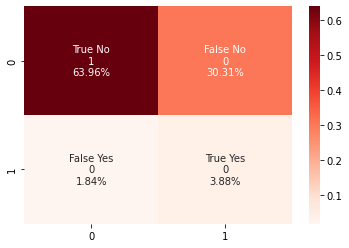

In [92]:
group_names = ['True No', 'False No', 'False Yes', 'True Yes']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

### Evaluation

In [93]:
# this model also cannot make proper enough predictions for customers accepting the offer...

## UpSampling using SMOTE: KNN

In [94]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_sm, y_train_sm)

KNeighborsClassifier(n_neighbors=4)

In [95]:
predictions_knn = knn.predict(X_test_trans_sm)
score_knn = knn.score(X_test_trans_sm, y_test)
score_knn

0.8395236745109158

In [96]:
# making a confusion matrix
confusion_matrix(y_test, predictions_knn)
cf_matrix = confusion_matrix(y_test, predictions_knn, normalize='all')
cf_matrix

array([[0.8230791 , 0.11964843],
       [0.0408279 , 0.01644457]])

<AxesSubplot:>

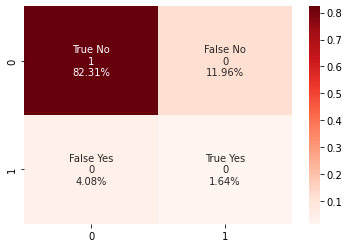

In [97]:
group_names = ['True No', 'False No', 'False Yes', 'True Yes']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

## DownSampling using class_weight

In [98]:
X = data_m.drop('offer_accepted', axis=1)
y = data_m['offer_accepted']

In [99]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [100]:
# applying the ColumnTransformer
ct.fit(X_train)
X_train_trans_ds = ct.transform(X_train)

In [101]:
# applying the same transformation on the X_test
X_test_trans_ds = ct.transform(X_test)

In [102]:
# yes = data_m[data_m['offer_accepted'] == 'Yes'].sample(1008)
# no = data_m[data_m['offer_accepted'] == 'No'].sample(1008)
# downsampled = pd.concat([yes, no]).sample(frac=1) 
# downsampled

In [103]:
# fitting the model
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train_trans_ds, y_train)

LogisticRegression(class_weight='balanced')

In [104]:
# result:
print(logreg.score(X_test_trans_ds, y_test))

0.6648709951800397


In [105]:
# getting predictions
predictions_ds = logreg.predict(X_test_trans_ds)
predictions_ds

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'Yes'], dtype=object)

In [106]:
# making a confusion matrix
confusion_matrix(y_test, predictions_ds)
cf_matrix = confusion_matrix(y_test, predictions_ds, normalize='all')
cf_matrix

array([[0.62489368, 0.31783385],
       [0.01729515, 0.03997732]])

<AxesSubplot:>

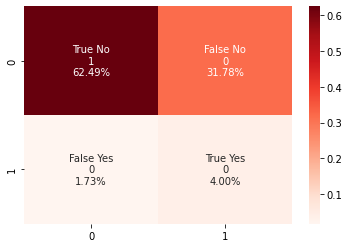

In [107]:
group_names = ['True No', 'False No', 'False Yes', 'True Yes']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

### Evaluation

In [108]:
# this model also cannot make proper enough predictions for customers accepting the offer...

# Less features = better?

In [109]:
# dropping features manually
# because of the 'inf' VIF the columns representing the balance per quarter will be dropped 
# overdraft_protection is dropped due to the very large imbalance
# homes_owned_clipped is dropped for the same reason
data_less = data_m.drop(['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance', 'overdraft_protection', 'homes_owned_clipped'], axis=1)

In [110]:
data_less.head()

,average_balance,bank_accounts_open_clipped,credit_cards_held_clipped,household_size_clipped,offer_accepted,reward,mailer_type,income_level,credit_rating,own_your_home
0,8727.540288,1,2,4,No,Air Miles,Letter,High,High,No
1,564.246000,1,2,5,No,Air Miles,Letter,Medium,Medium,Yes
2,1301.986500,2,2,2,No,Air Miles,Postcard,High,Medium,Yes
3,9312.981708,2,1,4,No,Air Miles,Letter,Medium,High,No
4,9232.026637,1,2,5,No,Air Miles,Letter,Medium,Medium,Yes


In [111]:
# changing the ColumnTransformer 
# standardizing the continuous variable
# applying OneHotEncoder to the categorical variables (not dropping 'first')
# applying OrdinalEncoder to the ordinal variables

ord_mapping = [{'col' : 'income_level', 'mapping' : {'Low': 1, 'Medium': 2, 'High': 3}},
              {'col' : 'credit_rating', 'mapping' : {'Low': 1, 'Medium': 2, 'High': 3}}]

ct_less = ColumnTransformer(
    [("standard", StandardScaler(), ['average_balance']),
     ("onehot", OneHotEncoder(sparse=False),
      ['reward', 'mailer_type', 'own_your_home']),
     ("ordinal", encoders.OrdinalEncoder(mapping = ord_mapping),
     ['income_level', 'credit_rating'])])

In [112]:
X = data_less.drop('offer_accepted', axis=1)
y = data_less['offer_accepted']

In [113]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [114]:
# applying the ColumnTransformer
ct_less.fit(X_train)
X_train_trans_less = ct_less.transform(X_train)

In [115]:
# applying the same transformation on the X_test
X_test_trans_less = ct_less.transform(X_test)

In [116]:
# fitting the model
logreg = LogisticRegression()
logreg.fit(X_train_trans_less, y_train)

LogisticRegression()

In [117]:
# result:
print(logreg.score(X_test_trans_less, y_test))

0.9427275304791608


In [118]:
# precision-recall
y_score = logreg.decision_function(X_test_trans_less)

In [119]:
average_precision = average_precision_score(y_test, y_score, pos_label="Yes")

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.14')

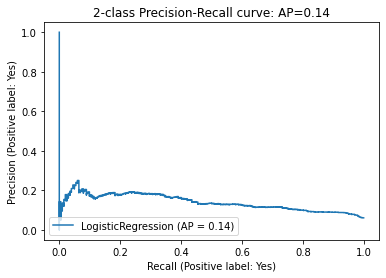

In [120]:
disp = plot_precision_recall_curve(logreg, X_test_trans_less, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

## Less features: KNN

In [121]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_trans_less, y_train)

KNeighborsClassifier(n_neighbors=4)

In [122]:
predictions_knn = knn.predict(X_test_trans_less)
score_knn = knn.score(X_test_trans_less, y_test)
score_knn

0.940459313864474

In [123]:
# making a confusion matrix
confusion_matrix(y_test, predictions_knn)
cf_matrix = confusion_matrix(y_test, predictions_knn, normalize='all')
cf_matrix

array([[9.39892260e-01, 2.83527077e-03],
       [5.67054154e-02, 5.67054154e-04]])

<AxesSubplot:>

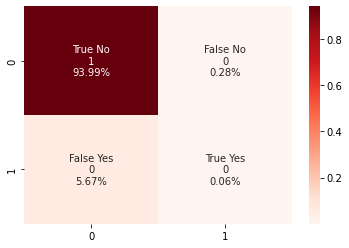

In [124]:
group_names = ['True No', 'False No', 'False Yes', 'True Yes']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

In [125]:
# precision-recall
y_scores = knn.predict_proba(X_test_trans_less)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1], pos_label='Yes')
roc_auc = auc(fpr, tpr)

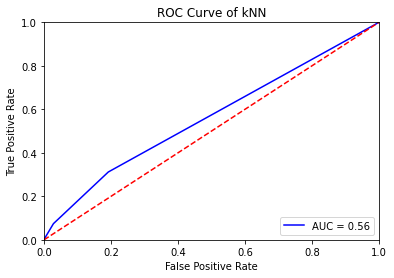

In [126]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## Combining less features with DownSampling (class_weight)

In [127]:
X = data_less.drop('offer_accepted', axis=1)
y = data_less['offer_accepted']

In [128]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [129]:
# applying the ColumnTransformer
ct_less.fit(X_train)
X_train_trans_less = ct_less.transform(X_train)

In [130]:
# applying the same transformation on the X_test
X_test_trans_less = ct_less.transform(X_test)

In [131]:
# fitting the model
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train_trans_less, y_train)

LogisticRegression(class_weight='balanced')

In [132]:
# result:
print(logreg.score(X_test_trans_less, y_test))

0.660901616104338


In [133]:
# getting predictions
predictions_less = logreg.predict(X_test_trans_less)
predictions_less

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'Yes'], dtype=object)

In [134]:
# making a confusion matrix
confusion_matrix(y_test, predictions_less)
cf_matrix = confusion_matrix(y_test, predictions_less, normalize='all')
cf_matrix

array([[0.62149135, 0.32123618],
       [0.01786221, 0.03941026]])

<AxesSubplot:>

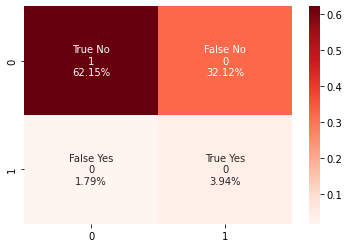

In [135]:
group_names = ['True No', 'False No', 'False Yes', 'True Yes']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

### Evaluation

In [136]:
# not much better

## Less features and UpSampling

In [137]:
X_train_sm_less, y_train_sm_less = smote.fit_resample(X_train_trans_less, y_train)
y_train_sm_less.value_counts()

No     13299
Yes    13299
Name: offer_accepted, dtype: int64

In [138]:
# fitting the model
logreg = LogisticRegression()
logreg.fit(X_train_sm_less, y_train_sm_less)

LogisticRegression()

In [139]:
# result:
print(logreg.score(X_test_trans_less, y_test))

0.6665721576410547


In [140]:
# getting predictions
predictions_sm_less = logreg.predict(X_test_trans_less)
predictions_sm_less

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'Yes'], dtype=object)

In [141]:
# making a confusion matrix
confusion_matrix(y_test, predictions_sm_less)
cf_matrix = confusion_matrix(y_test, predictions_sm_less, normalize='all')
cf_matrix

array([[0.62659484, 0.31613269],
       [0.01729515, 0.03997732]])

<AxesSubplot:>

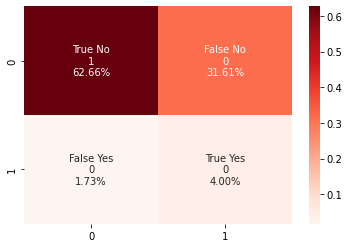

In [142]:
group_names = ['True No', 'False No', 'False Yes', 'True Yes']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

# Not standardized = better?

In [143]:
# applying OneHotEncoder to the categorical variables (not dropping 'first')
# applying OrdinalEncoder to the ordinal variables

ord_mapping = [{'col' : 'income_level', 'mapping' : {'Low': 1, 'Medium': 2, 'High': 3}},
              {'col' : 'credit_rating', 'mapping' : {'Low': 1, 'Medium': 2, 'High': 3}}]

ct_2 = ColumnTransformer(
    [("onehot", OneHotEncoder(sparse=False),
      ['reward', 'mailer_type', 'own_your_home']),
     ("ordinal", encoders.OrdinalEncoder(mapping = ord_mapping),
      ['income_level', 'credit_rating'])])

In [144]:
X = data_less.drop('offer_accepted', axis=1)
y = data_less['offer_accepted']

In [145]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [146]:
# applying the ColumnTransformer
ct_2.fit(X_train)
X_train_trans_less = ct_2.transform(X_train)

In [147]:
# applying the same transformation on the X_test
X_test_trans_less = ct_2.transform(X_test)

In [148]:
# fitting the model
logreg = LogisticRegression()
logreg.fit(X_train_trans_less, y_train)

LogisticRegression()

In [149]:
# result:
print(logreg.score(X_test_trans_less, y_test))

0.9427275304791608


In [150]:
# getting predictions
predictions = logreg.predict(X_test_trans_less)
predictions

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [151]:
# making a confusion matrix
confusion_matrix(y_test, predictions)
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
cf_matrix

array([[0.94272753, 0.        ],
       [0.05727247, 0.        ]])

<AxesSubplot:>

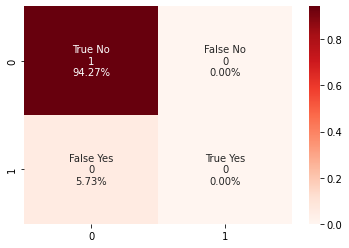

In [152]:
group_names = ['True No', 'False No', 'False Yes', 'True Yes']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

# Everything standardized = better? DownSampling

In [153]:
data_less.head()

,average_balance,bank_accounts_open_clipped,credit_cards_held_clipped,household_size_clipped,offer_accepted,reward,mailer_type,income_level,credit_rating,own_your_home
0,8727.540288,1,2,4,No,Air Miles,Letter,High,High,No
1,564.246000,1,2,5,No,Air Miles,Letter,Medium,Medium,Yes
2,1301.986500,2,2,2,No,Air Miles,Postcard,High,Medium,Yes
3,9312.981708,2,1,4,No,Air Miles,Letter,Medium,High,No
4,9232.026637,1,2,5,No,Air Miles,Letter,Medium,Medium,Yes


In [154]:
X = data_less.drop('offer_accepted', axis=1)
y = data_less['offer_accepted']

In [155]:
hot_columns = ['reward', 'mailer_type', 'own_your_home']

one_hot = OneHotEncoder(sparse=False).fit(X[hot_columns])
hot = one_hot.transform(X[hot_columns])
hot

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [156]:
hot_encoded = pd.DataFrame(hot, index=X.index)

In [157]:
ord_mapping = [{'col' : 'income_level', 'mapping' : {'Low': 1, 'Medium': 2, 'High': 3}},
              {'col' : 'credit_rating', 'mapping' : {'Low': 1, 'Medium': 2, 'High': 3}}]
ordi = encoders.OrdinalEncoder(mapping = ord_mapping)
ordinal = ordi.fit_transform(X[['income_level', 'credit_rating']])
ordinal

,income_level,credit_rating
0,3,3
1,2,2
2,3,2
3,2,3
4,2,2
...,...,...
17995,3,1
17996,3,1
17997,3,1
17998,2,2


In [158]:
X_cat = pd.merge(ordinal, hot_encoded, left_index=True, right_index=True) 

In [159]:
X = pd.merge(X_cat, X.select_dtypes(np.number), left_index=True, right_index=True)
X.head()

,income_level,credit_rating,0,1,2,3,4,5,6,average_balance,bank_accounts_open_clipped,credit_cards_held_clipped,household_size_clipped
0,3,3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,8727.540288,1,2,4
1,2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,564.246000,1,2,5
2,3,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1301.986500,2,2,2
3,2,3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,9312.981708,2,1,4
4,2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,9232.026637,1,2,5


In [160]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [161]:
# applying the standardizer on both X_train & X_test
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [162]:
# applying the same transformation on the X_test
X_test_scaled = scaler.transform(X_test)

In [163]:
# fitting the model
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

In [164]:
# result:
print(logreg.score(X_test_scaled, y_test))

0.6617521973348455


In [165]:
# getting predictions
predictions = logreg.predict(X_test_scaled)
predictions

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'Yes'], dtype=object)

In [166]:
# making a confusion matrix
confusion_matrix(y_test, predictions)
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
cf_matrix

array([[0.62234193, 0.3203856 ],
       [0.01786221, 0.03941026]])

<AxesSubplot:>

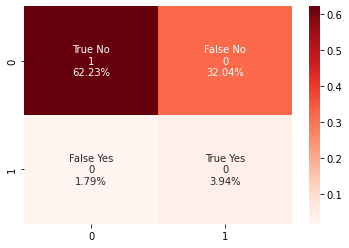

In [167]:
group_names = ['True No', 'False No', 'False Yes', 'True Yes']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

In [168]:
# precision-recall
y_scores = logreg.predict_proba(X_test_scaled)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1], pos_label='Yes')
roc_auc = auc(fpr, tpr)

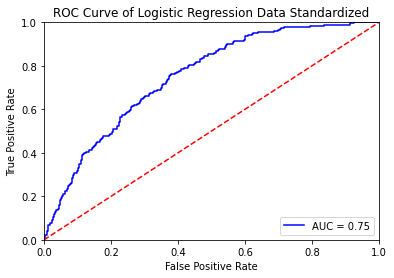

In [169]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression Data Standardized')
plt.show()

# Conclusion

The better models are the Logistic Regression model, with all features, in combination with DownSampling using class_weight, as well as the model with less features and SMOTE. These models performed a bit better than the rest in making predictions for a True 'Yes' 'offer_accepted'.  

# Notes for the next project

- better time management (ran out of time, again)
- ReadMe in bullet points & concise
- more functions (helper file.py)
- comparison graphs (BoXCox, outliers, ...)
- no #'s but markdowns for all comments
- order the import of libraries in alphabetical order
- check Chi-Square degrees of freedom
- structure the different models better (show precision-recall etc for all of the attempted models)

In this project I have learned a lot again. I tried to focus on parts which i didn't understood well enough yet and mastered quite some more skills, but because i got stuck on the models, i lost a lot of time, which i should have still spent on polishing everything. Nevertheless, i hope you found it interesting and thank you for taking the time to go through this rough copy of my work :)) 